In [12]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,8) #adjust configuration of plots

pd.options.mode.chained_assignment = None

#read in the data
df = pd.read_csv(r"C:\Users\ntsg8\Downloads\movies.csv")

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [13]:
#look for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print("{} - {}%".format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [14]:
#drop missing data
df=df.dropna()
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print("{} - {}%".format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [15]:
#columns datatypes
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [16]:
#correcting the year of release
df["yearcorrect"] = df["released"].str.extract(pat = "([0-9]{4})").astype(int)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [17]:
#delete any duplicate data
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,2020


In [18]:
#sort the dataset
df.sort_values(by=["gross"], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000.0,5.073000e+03,Two Prong Lesson,96.0,2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000.0,2.970000e+03,Trimark Pictures,97.0,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000.0,2.554000e+03,Copperheart Entertainment,108.0,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000.0,2.270000e+03,Embassy Pictures,85.0,1982


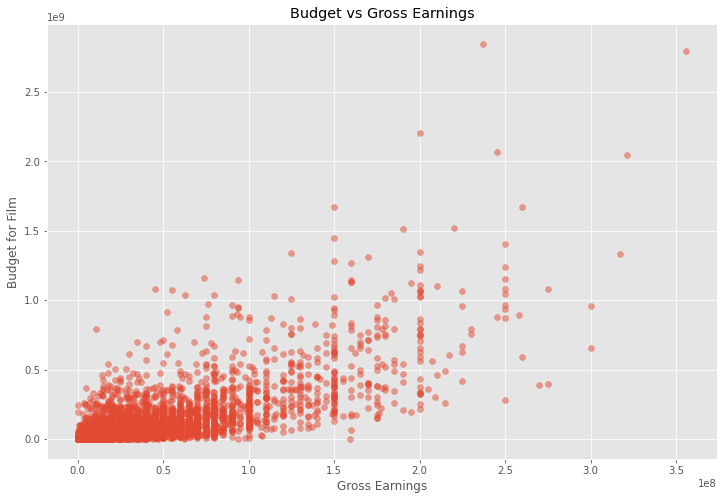

In [19]:
#scatterplot for budget vs gross earning
plt.scatter(x=df["budget"], y=df["gross"], alpha=0.5)
plt.title("Budget vs Gross Earnings")
plt.xlabel("Gross Earnings")
plt.ylabel("Budget for Film")
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

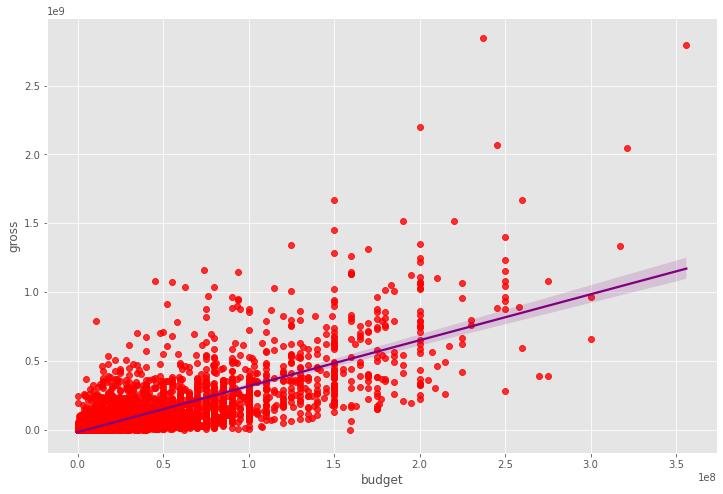

In [21]:
#plot budget vs gross earning using seaborn
sns.regplot(x="budget", y="gross", data=df, scatter_kws={"color":"red"}, line_kws={"color":"purple"})

In [23]:
#look for correlation
df.corr(method="pearson")

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


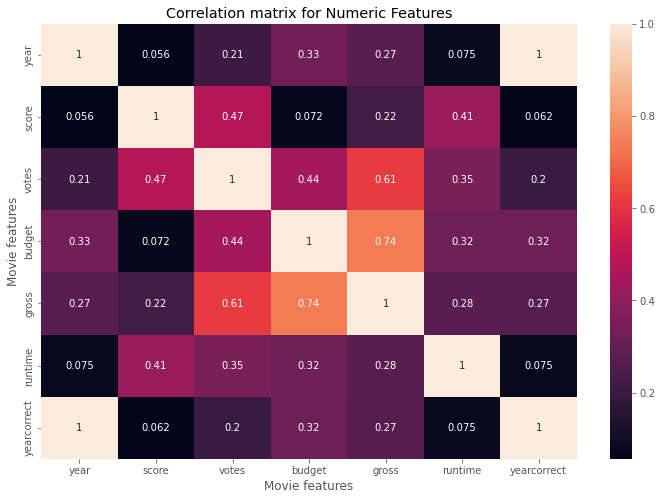

In [25]:
correlation_matrix = df.corr(method="pearson")
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [26]:
#check details about compaines
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000.0,46998772.0,1426,146.0,1980
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000.0,58853106.0,452,104.0,1980
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000.0,538375067.0,945,124.0,1980
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000.0,83453539.0,1108,88.0,1980
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000.0,39846344.0,1083,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000.0,16,2390,1812,47,90000000.0,426505244.0,452,124.0,2020
7649,3556,4,0,2020,713,6.5,102000.0,852,2309,147,47,85000000.0,319715683.0,1108,99.0,2020
7650,1153,4,1,2020,904,5.6,53000.0,1809,2827,1470,47,175000000.0,245487753.0,1397,101.0,2020
7651,3978,4,1,2020,758,6.8,42000.0,294,2091,640,6,135000000.0,111105497.0,12,100.0,2020


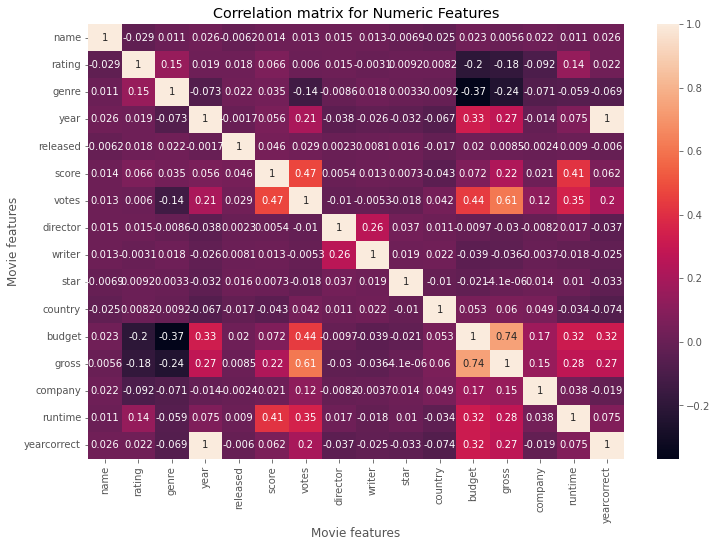

In [27]:
#plot correlation for companies
correlation_matrix = df_numerized.corr(method="pearson")
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

In [29]:
correlation_mat=df_numerized.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
                              ...   
yearcorrect  budget         0.320312
             gross          0.268721
             company       -0.018806
             runtime        0.075294
             yearcorrect    1.000000
Length: 256, dtype: float64

In [31]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

genre        budget        -0.368523
budget       genre         -0.368523
gross        genre         -0.244101
genre        gross         -0.244101
rating       budget        -0.203946
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [32]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross        votes          0.614751
votes        gross          0.614751
gross        budget         0.740247
budget       gross          0.740247
year         yearcorrect    0.998726
yearcorrect  year           0.998726
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
#votes and budget have high correlation to project
#company has low correlation